Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from glob import glob

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=batch_size, image_size=(img_height,
    img_width), seed=123, validation_split=0.2, subset="training",
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=batch_size, image_size=(img_height,
    img_width), seed=123, validation_split=0.2, subset="validation",
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

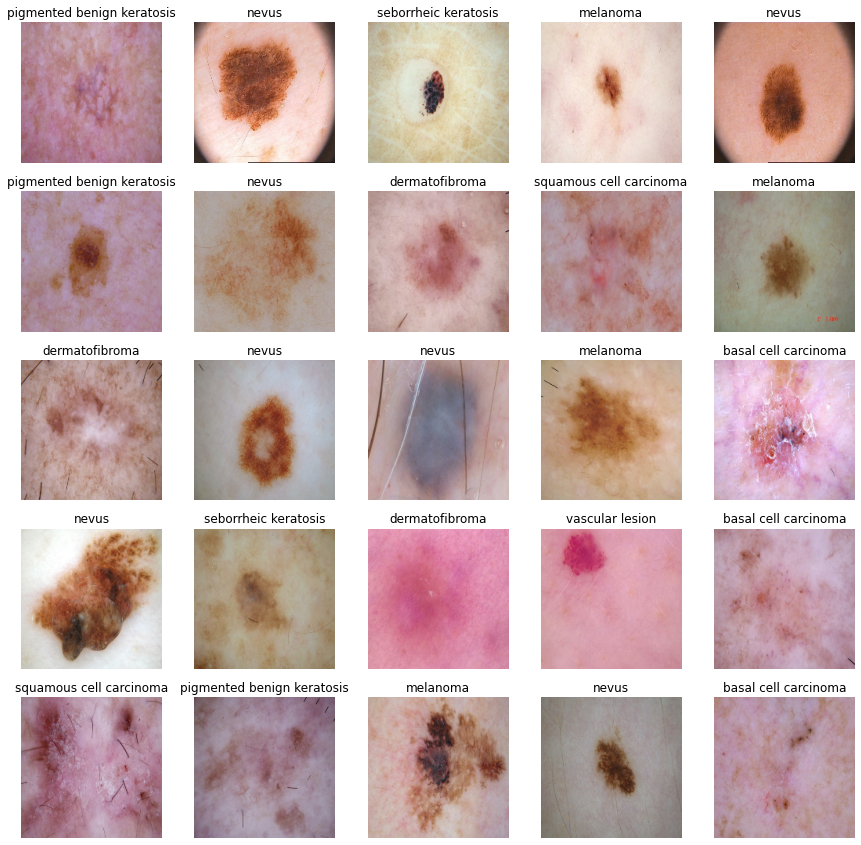

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
input_shape = (180,180,3)
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(
    scale = 1./255 , offset=0.0, input_shape = input_shape)
num_classes = 9

model = Sequential([
                    rescale,
                    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
                    layers.MaxPooling2D(pool_size = (2, 2)),
                    layers.Flatten(),
                    layers.Dense(512, activation='relu'),
                    layers.Dense(num_classes, activation='softmax')
                    ])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               6

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 291s 1s/step - loss: 3.2612 - accuracy: 0.2360 - val_loss: 1.8716 - val_accuracy: 0.3132
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.7112 - accuracy: 0.3828 - val_loss: 1.5488 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 1.5470 - accuracy: 0.4626 - val_loss: 1.5965 - val_accuracy: 0.4586
Epoch 4/20
56/56 [==============================] - 2s 41ms/step - loss: 1.3274 - accuracy: 0.5430 - val_loss: 1.5145 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 1.2144 - accuracy: 0.5709 - val_loss: 1.4721 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.1177 - accuracy: 0.6189 - val_loss: 1.4159 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 0.9894 - accuracy: 0.6546 - val_loss: 1.4947 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing training results

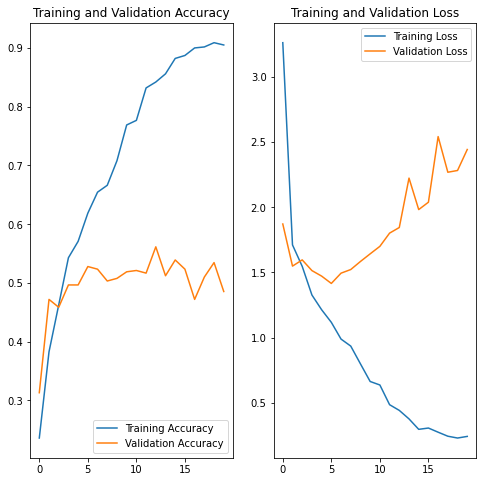

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


### Write your findings here

- Here from plot we can see that there is huge difference in the trainning accuracy and validation accuracy. Thus we can conclude that our model overfitted tha data.

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)])

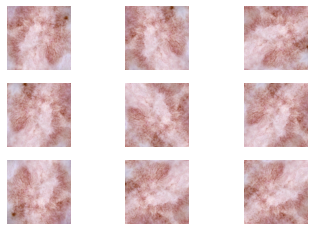

In [19]:
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [20]:

model = Sequential([
                    data_augmentation,
                    rescale,
                    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Dropout(0.25),
                    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
                    layers.MaxPooling2D(pool_size = (2, 2)),
                    layers.Flatten(),
                    layers.Dense(512, activation='relu'),
                    layers.Dense(num_classes, activation='softmax')
                    ])

### Compiling the model

In [21]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 47ms/step - loss: 5.5691 - accuracy: 0.2254 - val_loss: 2.0929 - val_accuracy: 0.2953
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 1.8335 - accuracy: 0.3415 - val_loss: 1.9604 - val_accuracy: 0.3087
Epoch 3/20
56/56 [==============================] - 2s 45ms/step - loss: 1.6455 - accuracy: 0.4191 - val_loss: 1.7825 - val_accuracy: 0.3512
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 1.5679 - accuracy: 0.4448 - val_loss: 1.7745 - val_accuracy: 0.3154
Epoch 5/20
56/56 [==============================] - 3s 45ms/step - loss: 1.5109 - accuracy: 0.4654 - val_loss: 1.8265 - val_accuracy: 0.2908
Epoch 6/20
56/56 [==============================] - 2s 45ms/step - loss: 1.4825 - accuracy: 0.4682 - val_loss: 1.7963 - val_accuracy: 0.3020
Epoch 7/20
56/56 [==============================] - 2s 45ms/step - loss: 1.5058 - accuracy: 0.4576 - val_loss: 1.7012 - val_accuracy: 0.3826
Epoch 8/20
56

### Visualizing the results

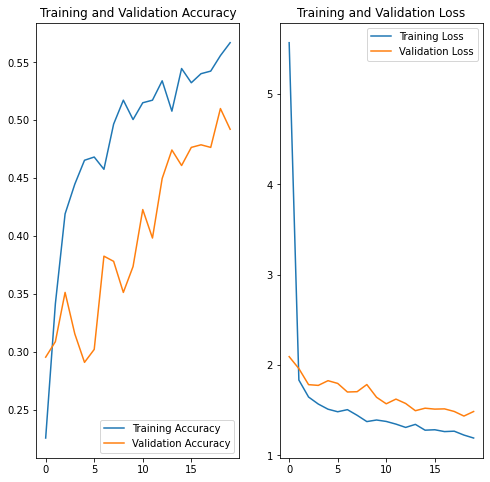

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
- From above plot we can see that our model on uderfitted this time, but the good thing is there is not much difference between training and validation accuracy.
- For underfitting there could be the reason of class imbalance so we will check for class distribution.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
df = pd.DataFrame(np.concatenate([i for x, i in train_ds]), columns=['class'])
df['class'].value_counts()


5    370
3    352
1    309
4    277
7    142
8    115
0     92
2     77
6     58
Name: class, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- 6th class which is "Seborrheic keratosis" has least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
- 5th, 3rd, 1st and 4rth classes which are 'pigmented benign keratosis', 'melanoma', 'basal cell carcinoma', 'nevus' have most number of samples thus they are dominating.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A9625EAD0>: 100%|██████████| 500/500 [00:19<00:00, 25.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A96163F90>: 100%|██████████| 500/500 [00:19<00:00, 26.14 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9A96764C50>:   0%|          | 1/500 [00:00<01:18,  6.32 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A9609E550>: 100%|██████████| 500/500 [00:19<00:00, 25.84 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9AF70D0690>: 100%|██████████| 500/500 [01:26<00:00,  5.76 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F9A96667910>: 100%|██████████| 500/500 [01:18<00:00,  6.37 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9A98F11290>:   0%|          | 1/500 [00:00<01:01,  8.17 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A96714BD0>: 100%|██████████| 500/500 [00:19<00:00, 26.25 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9A96693CD0>: 100%|██████████| 500/500 [00:41<00:00, 12.17 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A96102510>: 100%|██████████| 500/500 [00:18<00:00, 26.83 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A966F9C50>:   0%|          | 1/500 [00:00<00:54,  9.11 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A96102290>: 100%|██████████| 500/500 [00:19<00:00, 25.33 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [33]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026765.jpg_f37e5564-221b-4e1e-90dc-cf34b588d8d0.jpg',
 '/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027254.jpg_c67e1401-1fa8-44f4-90a0-a6c31f6d25d6.jpg',
 '/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027802.jpg_cf63de2e-85ed-4119-aa2b-8c479fa28688.jpg',
 '/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033705.jpg_4c0d89ee-f8da-47a0-a3b8-3034c6d41315.jpg',
 '/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISI

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [35]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [36]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [37]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
data_dir_train="/content/gdrive/MyDrive/DL Datasets/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [44]:
model = Sequential([
                    data_augmentation,
                    rescale,
                    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Dropout(0.25),
                    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
                    layers.MaxPooling2D(pool_size = (2, 2)),
                    layers.Flatten(),
                    layers.Dense(512, activation='relu'),
                    layers.Dense(num_classes, activation='softmax')
                    ])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [45]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [46]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 37s 209ms/step - loss: 3.6852 - accuracy: 0.1834 - val_loss: 2.0300 - val_accuracy: 0.2754
Epoch 2/30
169/169 [==============================] - 35s 204ms/step - loss: 1.6650 - accuracy: 0.3683 - val_loss: 1.8371 - val_accuracy: 0.3274
Epoch 3/30
169/169 [==============================] - 35s 205ms/step - loss: 1.5238 - accuracy: 0.4216 - val_loss: 1.7173 - val_accuracy: 0.3556
Epoch 4/30
169/169 [==============================] - 35s 204ms/step - loss: 1.4357 - accuracy: 0.4432 - val_loss: 1.5587 - val_accuracy: 0.4254
Epoch 5/30
169/169 [==============================] - 36s 205ms/step - loss: 1.3906 - accuracy: 0.4692 - val_loss: 1.5249 - val_accuracy: 0.4254
Epoch 6/30
169/169 [==============================] - 35s 203ms/step - loss: 1.3478 - accuracy: 0.4794 - val_loss: 1.5675 - val_accuracy: 0.3950
Epoch 7/30
169/169 [==============================] - 36s 205ms/step - loss: 1.3028 - accuracy: 0.4981 - val_loss: 1.4591 - val_ac

#### **Todo:**  Visualize the model results

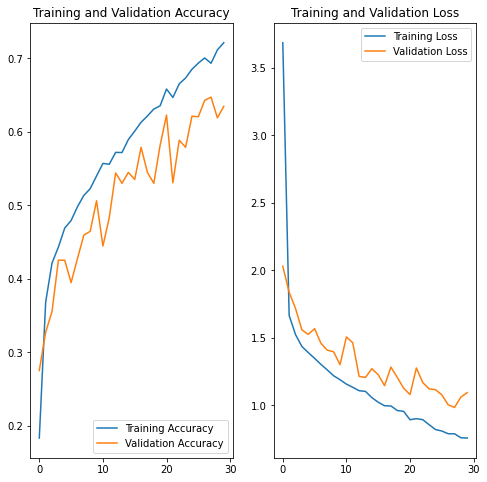

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



From above plots we can clearly see that out training as well as validation accuracy increased with decent amount. Thus to comclude we can say that data augmentation and mainly class balancing helped to get decent accuracy.